<a href="https://colab.research.google.com/github/cchun-sejong/25-1/blob/main/week10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder,RobustScaler; scaler = RobustScaler(); encoder = LabelEncoder()

import warnings as w; w.filterwarnings(action='ignore')

In [ ]:
normal = pd.read_csv('x_train_normal.csv',low_memory=True)
# normal['Target'] = 0
abnormal = pd.read_csv('x_train_abnormal.csv',low_memory=True)
# abnormal['Target'] = 1
x_test = pd.read_csv('x_test.csv',low_memory=True)
# df = pd.concat([normal,abnormal],axis=0)
# df.set_index('Unnamed: 0',inplace=True)
print('Normal Data:',normal.shape)
print('Abnormal Data:', abnormal.shape)
print('Test Set:',x_test.shape)
display(x_test.head())

Normal Data: (1104000, 1)
Abnormal Data: (1104000, 1)
Test Set: (552, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.276,0.093,0.273,-0.042,-0.073,-0.173,-0.076,0.100,-0.063,-0.195,...,-0.051,0.125,0.125,-0.115,-0.125,-0.022,0.085,0.088,-0.024,-0.063
1,-0.266,-0.173,0.291,0.334,-0.090,-0.405,-0.105,0.210,0.154,-0.144,...,0.034,-0.007,0.002,0.005,-0.002,0.017,0.164,0.151,-0.010,-0.164
2,-0.259,-0.076,-0.007,-0.032,-0.015,0.015,0.027,-0.132,-0.029,0.132,...,-0.002,-0.107,-0.046,-0.017,-0.098,0.002,-0.037,-0.027,-0.090,0.010
3,-0.251,-0.168,0.005,-0.005,-0.100,-0.059,-0.007,0.017,0.032,0.083,...,-0.015,-0.002,0.024,0.081,0.068,0.034,0.085,0.093,0.081,0.088
4,-0.244,0.022,-0.100,-0.173,-0.017,-0.027,-0.046,-0.103,0.015,-0.068,...,0.137,-0.017,-0.105,-0.103,-0.051,-0.154,-0.164,0.027,0.005,-0.076


In [ ]:
def compute_skewness(x):
    n = len(x)
    third_moment = np.sum((x-np.mean(x))**3) / n
    s_3 = np.std(x,ddof=1) ** 3
    return third_moment / s_3

def compute_kurtosis(x):
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x)) ** 4) / n
    s_4 = np.std(x, ddof= 1) ** 4
    return fourth_moment / s_4 - 3

def cal(temp_data):
    feature_matrix = np.zeros((1,10))
    temp = temp_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    feature_matrix[0,9] = np.max(temp) - np.min(temp)
    return feature_matrix

In [ ]:
def feature_extraction(data,sampling_size=20480,mode='train'):
    Time_feature_matrix = pd.DataFrame()
    if mode == 'train':
        data_len = len(data)
        split = data_len / sampling_size
        for i in tqdm_notebook(range(int(split))):
            if i == 0:
                temp_data = data[:sampling_size]
            else:
                temp_data = data[sampling_size*i:sampling_size*(i+1)]
            feature_axtrix = cal(temp_data)
            df = pd.DataFrame(feature_axtrix)
            Time_feature_matrix = Time_feature_matrix.append(df)
    else:
        for d in tqdm_notebook(data.values):
            feature_matrix = cal(d)
            df = pd.DataFrame(feature_matrix)
            Time_feature_matrix = Time_feature_matrix.append(df)
    Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis',
                                           'Crest Factor','Form Factor','Peak to peak(P_P)']
    return Time_feature_matrix

In [ ]:
df_normal = feature_extraction(normal,sampling_size=1000)
df_normal['Fault'] = 'Normal'

  0%|          | 0/1104 [00:00<?, ?it/s]

In [ ]:
df_abnormal = feature_extraction(abnormal,sampling_size=1000)
df_abnormal['Fault'] = 'Abnormal'

  0%|          | 0/1104 [00:00<?, ?it/s]

In [ ]:
x_test = feature_extraction(x_test,mode='test')
x_test

  0%|          | 0/552 [00:00<?, ?it/s]

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Peak to peak(P_P)
0,0.369,-0.320,-0.003602,0.079210,0.079252,0.156439,1.003997,4.656009,-22.002337,0.689
0,0.334,-0.405,-0.000943,0.078091,0.078058,-0.096848,1.197884,4.278888,-82.775890,0.739
0,0.383,-0.288,-0.002508,0.092984,0.092971,0.169790,0.129954,4.119544,-37.069959,0.671
0,0.347,-0.261,-0.004352,0.078013,0.078095,-0.022539,0.460881,4.443283,-17.944719,0.608
0,0.349,-0.291,-0.004200,0.093519,0.093567,0.159126,0.067261,3.729950,-22.277845,0.640
...,...,...,...,...,...,...,...,...,...,...
0,0.381,-0.269,-0.002743,0.091175,0.091171,0.250815,0.378680,4.178971,-33.237611,0.650
0,0.430,-0.266,0.001227,0.096278,0.096238,0.173356,0.224940,4.468099,78.433418,0.696
0,0.281,-0.239,0.000044,0.076667,0.076629,0.112456,0.296011,3.667035,1741.560524,0.520
0,0.325,-0.310,-0.002673,0.093750,0.093741,0.182281,0.141715,3.466992,-35.069656,0.635


In [ ]:
df = pd.concat([df_normal,df_abnormal],axis=0)
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Peak to peak(P_P),Fault
0,0.417,-0.474,0.001318,0.105396,0.105352,0.041076,0.789339,3.958164,79.933139,0.891,Normal
0,0.232,-0.320,-0.003561,0.087025,0.087054,-0.037565,-0.159326,2.665014,-24.446488,0.552,Normal
0,0.393,-0.273,-0.001247,0.096394,0.096354,0.277471,0.215874,4.078704,-77.268752,0.666,Normal
0,0.286,-0.249,0.001477,0.091467,0.091433,0.170207,0.003734,3.127962,61.904771,0.535,Normal
0,0.352,-0.288,-0.004324,0.097617,0.097664,0.154056,0.062078,3.604205,-22.586424,0.640,Normal
...,...,...,...,...,...,...,...,...,...,...,...
0,0.269,-0.322,-0.002601,0.073617,0.073626,-0.015389,0.404067,3.653617,-28.306677,0.591,Abnormal
0,0.251,-0.303,-0.003891,0.081806,0.081858,0.009565,0.319105,3.066289,-21.037759,0.554,Abnormal
0,0.225,-0.269,-0.006352,0.074866,0.075098,-0.002274,0.237658,2.996089,-11.822717,0.494,Abnormal
0,0.227,-0.247,-0.001601,0.076248,0.076226,0.012153,-0.191975,2.977979,-47.611615,0.474,Abnormal


Normal      1104
Abnormal    1104
Name: Fault, dtype: int64


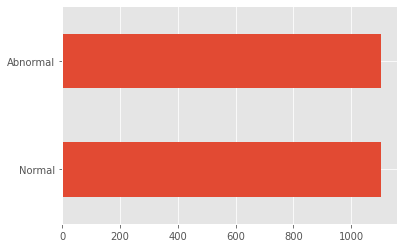

In [ ]:
print(df.Fault.value_counts())
df.Fault.value_counts(ascending=True).plot.barh()

In [ ]:
df.Fault = encoder.fit_transform(df.Fault)

In [ ]:
encoder.classes_

array(['Abnormal', 'Normal'], dtype=object)

In [ ]:
X = df.drop('Fault',axis=1)
Y = df.Fault.values
print(X.shape,Y.shape)

(2208, 10) (2208,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,Y,test_size=0.2,stratify=Y,shuffle=True,random_state=0)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(1766, 10) (442, 10) (1766,) (442,)


In [ ]:
def metric(y_true,y_pred):
    print('Accuracy:{:.3f}%'.format(accuracy_score(y_true,y_pred)))
    print('F1 score:{:.3f}%'.format(f1_score(y_true,y_pred)))
    print('Recall:{:.3f}%'.format(recall_score(y_true,y_pred)))
    print('Precision:{:.3f}%'.format(precision_score(y_true,y_pred)))



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
model = RandomForestClassifier(n_estimators=500,max_depth=50,n_jobs=-1,oob_score=True)
model.fit(x_train,y_train)
pred = model.predict(x_valid)
metric(y_valid,pred)
print('Out of bag Score:{:.3f}%'.format(model.oob_score_))

Accuracy:0.986%
F1 score:0.987%
Recall:0.995%
Precision:0.978%
Out of bag Score:0.988%


0    221
1    221
dtype: int64


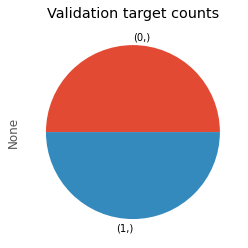

In [ ]:
plt.title('Validation target counts')
print(pd.DataFrame(y_valid).value_counts())
pd.DataFrame(y_valid).value_counts().plot(kind='pie')
plt.show()

1    225
0    217
dtype: int64


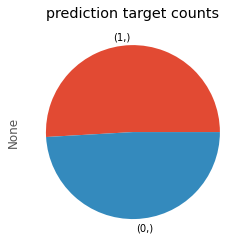

In [ ]:
plt.title('prediction target counts')
print(pd.DataFrame(pred).value_counts())
pd.DataFrame(pred).value_counts().plot(kind='pie')
plt.show()

In [ ]:
pred = model.predict(x_test)

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission.Fault = pred
submission

,index,Fault
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
547,547,1
548,548,1
549,549,0
550,550,1


In [ ]:
submission.to_csv('my_submission.csv',index=False)